# Tarea N°3 - Máquinas de Aprendizaje - ILI393
### Martín Villanueva A.

## Introducción

En la presente tarea, se experimenta con algoritmos relacionados con redes neuronales artificiales, y ensamblado de máquinas con árboles de clasificación. La mayor parte de los algoritmos probados, corresponden a las implementaciones de Scikit-Learn, excepto por Extreme Learning Machines y Bagging que fueron implementadas, de modo que son compatibles con dicha libreria.

Donde corresponda, se realiza stratified 5-fold cross validation para la selección de los parámetros óptimos. Por temas de espacio, sólo se muestran los resultados de tal proceso en 2 datasets de los 20. Se muestra también histogramas de los mejores parámetros sobre los 20 datasets.

Para la comparación de los errores, se realizan error bars con el promedio del error sobre los 20 datasets. Las barras de error son computadas con el intervalo de confianza para la t-student (del error-rate medio) del 90%. 

## Feedforward ANN sin weight decay

In [121]:
#parameters to try on MPL
mlp_params = {'hidden_layer_sizes':[(25,),(50,),(75,),(100,),(125)], 'learning_rate_init':[0.05, 0.075, 0.1, 0.125, 0.15]}

##############################################################
Dataset: 3
Best parameter: {'learning_rate_init': 0.15, 'hidden_layer_sizes': (100,)}
CV scores:
mean: 0.77083, std: 0.02754, params: {'learning_rate_init': 0.05, 'hidden_layer_sizes': (25,)}
mean: 0.77778, std: 0.01983, params: {'learning_rate_init': 0.075, 'hidden_layer_sizes': (25,)}
mean: 0.77257, std: 0.02812, params: {'learning_rate_init': 0.1, 'hidden_layer_sizes': (25,)}
mean: 0.77431, std: 0.02331, params: {'learning_rate_init': 0.125, 'hidden_layer_sizes': (25,)}
mean: 0.77604, std: 0.01659, params: {'learning_rate_init': 0.15, 'hidden_layer_sizes': (25,)}
mean: 0.76389, std: 0.02907, params: {'learning_rate_init': 0.05, 'hidden_layer_sizes': (50,)}
mean: 0.77257, std: 0.03156, params: {'learning_rate_init': 0.075, 'hidden_layer_sizes': (50,)}
mean: 0.77951, std: 0.01197, params: {'learning_rate_init': 0.1, 'hidden_layer_sizes': (50,)}
mean: 0.77257, std: 0.02146, params: {'learning_rate_init': 0.125, 'hidden_laye

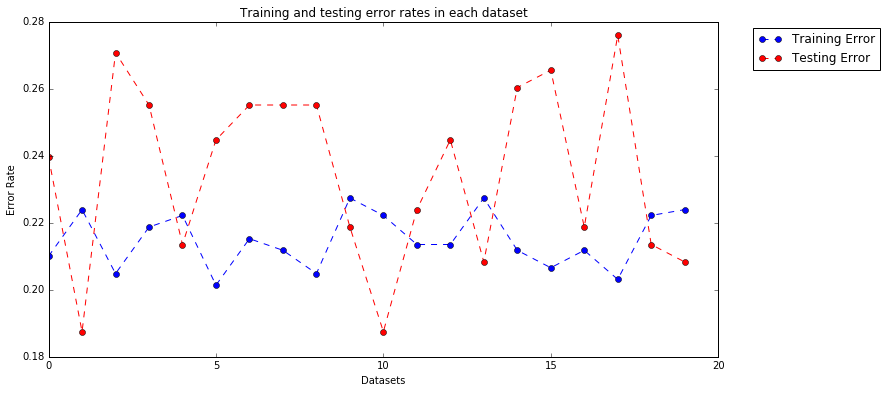

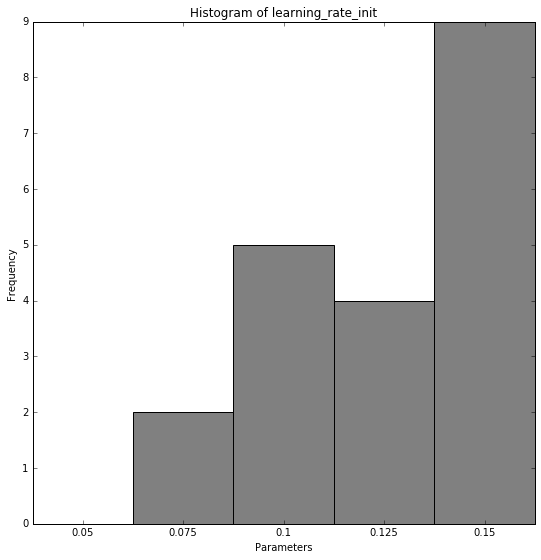

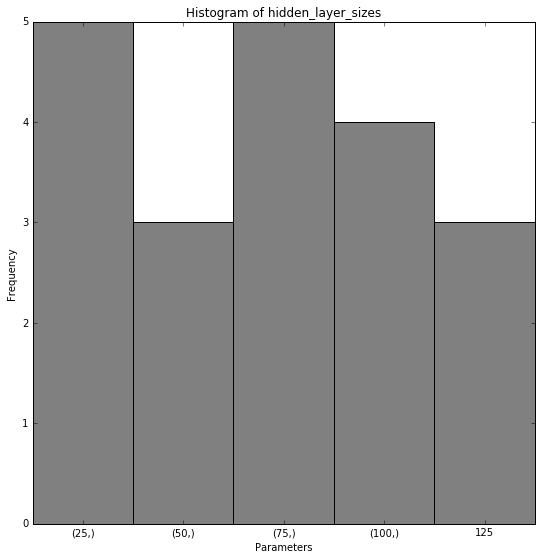

In [122]:
mlp = MLPClassifier(activation='logistic', algorithm='sgd', learning_rate='constant', alpha=0.)
mlp_tr_err, mlp_ts_err = solve_clf(mlp, params=mlp_params, show=[3,17])

## Feedforward ANN con weight decay

In [123]:
#parameters to try on MPL
mlp_params = {'alpha':[0.005, 0.01, 0.05, 0.1, 0.5]}

##############################################################
Dataset: 3
Best parameter: {'alpha': 0.5}
CV scores:
mean: 0.75521, std: 0.04816, params: {'alpha': 0.005}
mean: 0.74653, std: 0.04745, params: {'alpha': 0.01}
mean: 0.76042, std: 0.04097, params: {'alpha': 0.05}
mean: 0.76562, std: 0.03242, params: {'alpha': 0.1}
mean: 0.77778, std: 0.01991, params: {'alpha': 0.5}
Training error: 0.229166666667
Testing error: 0.25
##############################################################


##############################################################
Dataset: 17
Best parameter: {'alpha': 0.05}
CV scores:
mean: 0.77778, std: 0.02166, params: {'alpha': 0.005}
mean: 0.77257, std: 0.01708, params: {'alpha': 0.01}
mean: 0.78646, std: 0.02224, params: {'alpha': 0.05}
mean: 0.77778, std: 0.02224, params: {'alpha': 0.1}
mean: 0.78472, std: 0.02095, params: {'alpha': 0.5}
Training error: 0.204861111111
Testing error: 0.28125
##############################################################




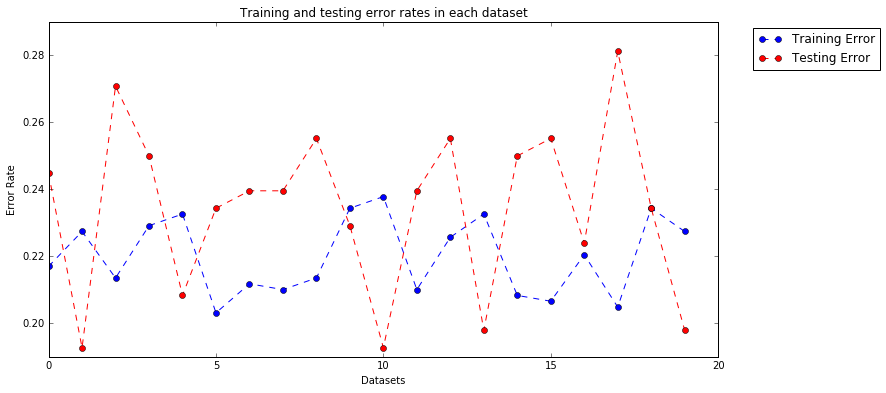

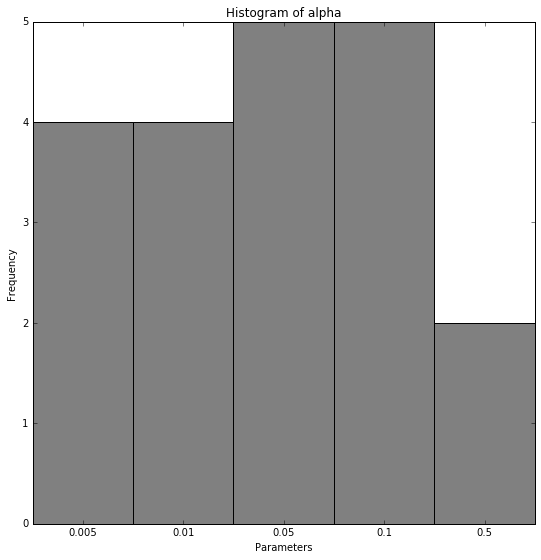

In [124]:
mlp = MLPClassifier(activation='logistic', algorithm='sgd', learning_rate='constant', learning_rate_init=0.15, hidden_layer_sizes=(100,))
mlp_tr_err, mlp_ts_err = solve_clf(mlp, params=mlp_params, show=[3,17])

## Extreme Learning Machine

In [125]:
elm_params = {'n_hidden':[50,100,150,200,250]}

##############################################################
Dataset: 3
Best parameter: {'n_hidden': 100}
CV scores:
mean: 0.77431, std: 0.02328, params: {'n_hidden': 50}
mean: 0.77604, std: 0.02672, params: {'n_hidden': 100}
mean: 0.77431, std: 0.02264, params: {'n_hidden': 150}
mean: 0.77257, std: 0.02307, params: {'n_hidden': 200}
mean: 0.77604, std: 0.02098, params: {'n_hidden': 250}
Training error: 0.210069444444
Testing error: 0.223958333333
##############################################################


##############################################################
Dataset: 17
Best parameter: {'n_hidden': 50}
CV scores:
mean: 0.78646, std: 0.03178, params: {'n_hidden': 50}
mean: 0.77604, std: 0.01372, params: {'n_hidden': 100}
mean: 0.77604, std: 0.01319, params: {'n_hidden': 150}
mean: 0.77431, std: 0.01757, params: {'n_hidden': 200}
mean: 0.77431, std: 0.01417, params: {'n_hidden': 250}
Training error: 0.208333333333
Testing error: 0.28125
##################################

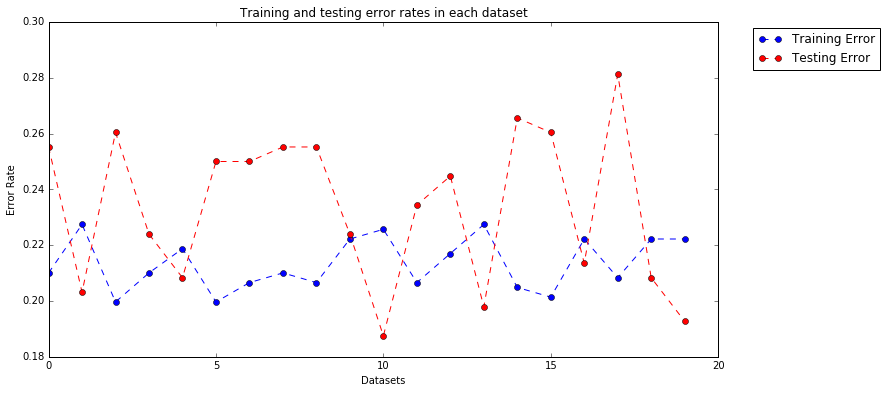

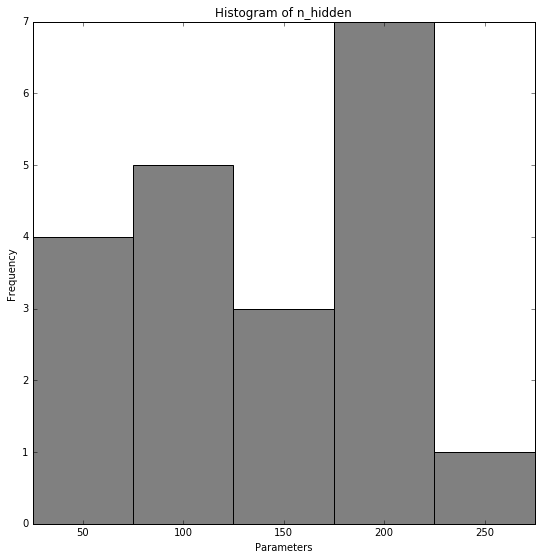

In [126]:
elm = ELM()
elm_tr_err, elm_ts_err = solve_clf(elm, params=elm_params, show=[3,17])

## AdaBoost

In [150]:
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=5)
ada_5_tr_err, ada_5_ts_err = solve_clf(clf, scale=False, show=[])

In [151]:
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=10)
ada_10_tr_err, ada_10_ts_err = solve_clf(clf, scale=False, show=[])

In [152]:
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=15)
ada_15_tr_err, ada_15_ts_err = solve_clf(clf, scale=False, show=[])

In [153]:
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=20)
ada_20_tr_err, ada_20_ts_err = solve_clf(clf, scale=False, show=[])

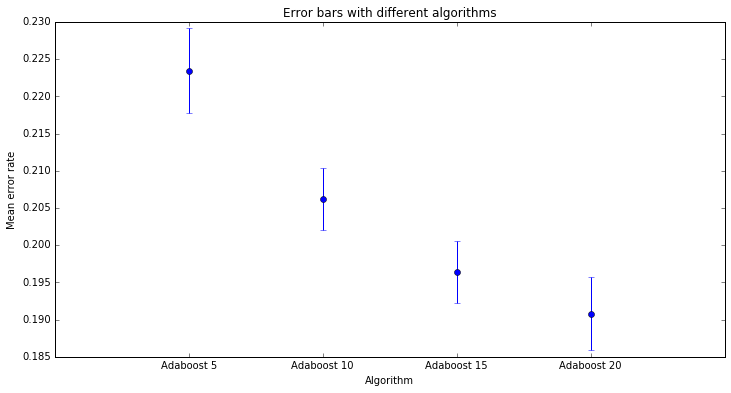

In [170]:
tr_errors = [('Adaboost 5',ada_5_tr_err), ('Adaboost 10',ada_10_tr_err), ('Adaboost 15',ada_15_tr_err), ('Adaboost 20',ada_20_tr_err)]
plot_errorbars(tr_errors)

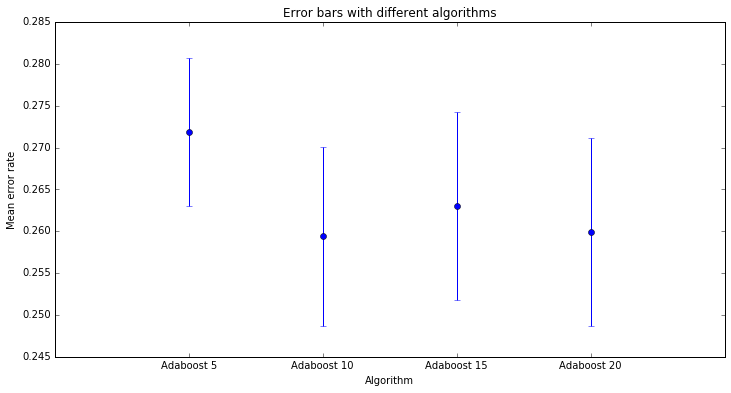

In [169]:
ts_errors = [('Adaboost 5',ada_5_ts_err), ('Adaboost 10',ada_10_ts_err), ('Adaboost 15',ada_15_ts_err), ('Adaboost 20',ada_20_ts_err)]
plot_errorbars(ts_errors)

## Bagging

In [156]:
clf = Bagging(n_estimators=5, max_depth=1)
bag_5_tr_err, bag_5_ts_err = solve_clf(clf, scale=False, show=[])

In [157]:
clf = Bagging(n_estimators=10, max_depth=1)
bag_10_tr_err, bag_10_ts_err = solve_clf(clf, scale=False, show=[])

In [158]:
clf = Bagging(n_estimators=15, max_depth=1)
bag_15_tr_err, bag_15_ts_err = solve_clf(clf, scale=False, show=[])

In [159]:
clf = Bagging(n_estimators=20, max_depth=1)
bag_20_tr_err, bag_20_ts_err = solve_clf(clf, scale=False, show=[])

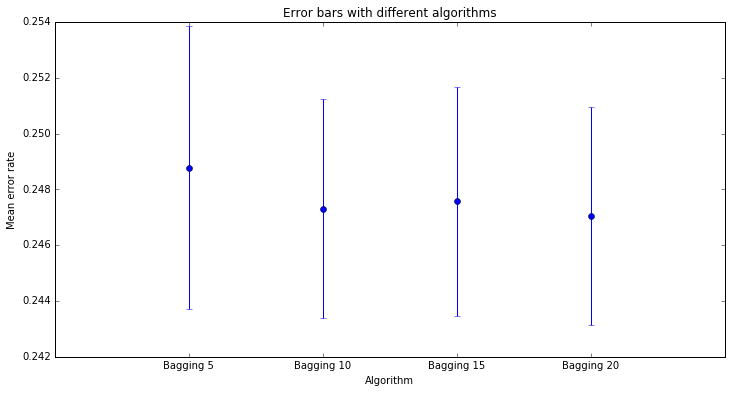

In [167]:
tr_errors = [('Bagging 5',bag_5_tr_err), ('Bagging 10',bag_10_tr_err), ('Bagging 15',bag_15_tr_err), ('Bagging 20',bag_20_tr_err)]
plot_errorbars(tr_errors)

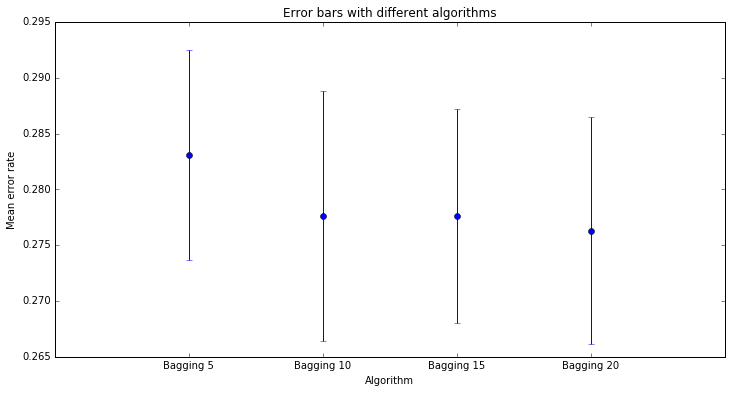

In [166]:
ts_errors = [('Bagging 5',bag_5_ts_err), ('Bagging 10',bag_10_ts_err), ('Bagging 15',bag_15_ts_err), ('Bagging 20',bag_20_ts_err)]
plot_errorbars(ts_errors)

## Comparaciones

In [165]:
errors = [('AdaBoost',adaboost_ts_err), ('Bagging',bagging_ts_err), ('ELM',elm_ts_err)]

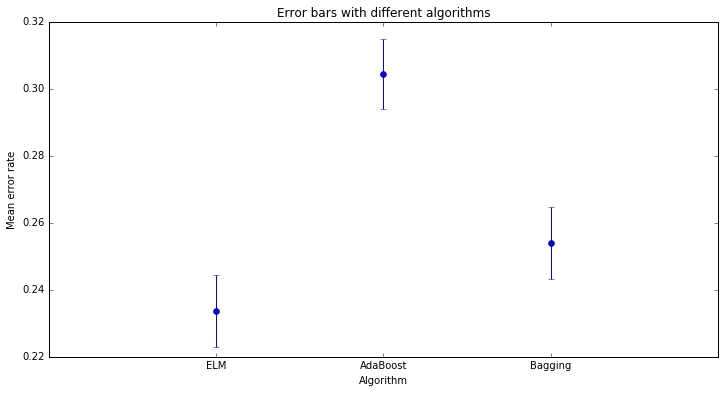

In [164]:
plot_errorbars(errors)

## Anexo de Código

**Observación:** Para la correcta ejecución del código en el informe, primero se deben ejecutar las celdas del anexo de código aquí abajo.

### Configuración del notebook

In [2]:
#notebook settings
%matplotlib inline

#import some useful libraries and utilities
import numpy as np
import scipy as sp
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import AdaBoostClassifier as AdaBoost

### Configuración del notebook

## Métricas de error para clasificación

In [17]:
#precision
def precision(yreal, ypred):
    yr = yreal.astype(int)
    yp = ypred.astype(int) 
    m, = yr.shape
    #number of good predictions/number of predictions
    return np.sum(yp==yr)/float(m)

#error rate 
def error_rate(yreal, ypred):
    return 1.-precision(yreal, ypred)

## Funciones complementarias (helpers) para obtener resultados

In [162]:
"""
Function to generate histogram of winners
"""
def make_hist(winners,params):
    for key in winners:
        par = params[key]
        win = np.array(winners[key])
        freqs = np.zeros(5)
        for i in xrange(5):
            freqs[i] = np.sum(par[i]==win)
        labels = map(str,par)
        pos = np.arange(len(labels))
        width = 1.0
        fig = plt.figure()
        fig.set_figheight(9)
        fig.set_figwidth(9)
        ax = plt.axes()
        ax.set_xticks(pos + (width / 2))
        ax.set_xticklabels(labels)
        plt.xlabel('Parameters')
        plt.ylabel('Frequency')
        plt.title('Histogram of {0}'.format(key))
        plt.bar(pos, freqs, width, color='0.5')
        plt.show()
    
def plot_error(tr_err, ts_err):
    x = np.arange(20)
    plt.figure(figsize=(12,6))
    plt.plot(x, tr_err, marker='o', linestyle='--', color='b', label='Training Error')
    plt.plot(x, ts_err, marker='o', linestyle='--', color='r', label='Testing Error')
    plt.xlabel('Datasets')
    plt.ylabel('Error Rate')
    plt.title('Training and testing error rates in each dataset')
    plt.legend(bbox_to_anchor=(1.25, 1.0))
    plt.show()
    

def mean_confidence_interval(data, confidence=0.9):
    #computing confidence interval
    n = data.shape[0]
    mu = np.mean(data)
    sem = sp.stats.sem(data)
    h1,h2 = sp.stats.t.interval(confidence, n-1, loc=mu, scale=sem)
    return mu, h1, h2

def mean_percentile(data, inf=10, sup=90):
    mu = np.mean(data)
    h1, h2 = np.percentile(data, [10,90])
    return mu, h1, h2

def plot_errorbars(errors, title=None):
    mean = []
    lower = []
    upper = []
    labels = []
    for label,error in errors:
        mu,l,u = mean_confidence_interval(error)
        #mu,l,u = mean_percentile(error)
        mean.append(mu)
        lower.append(l)
        upper.append(u)
        labels.append(label)
    x = np.arange(3, len(errors)+3)
    mean = np.array(mean)
    lower = mean-np.array(lower)
    upper = np.array(upper)-mean
    plt.figure(figsize=(12,6))
    plt.xlim([2,len(errors)+3])
    plt.xticks(x, labels)
    plt.errorbar(x, mean, yerr=[lower,upper],fmt='o')
    plt.xlabel('Algorithm')
    plt.ylabel('Mean error rate')
    plt.title(title)
    plt.show()

"""
Generate solutions for classification problems
"""
def solve_clf(clf, params=None, scale=True, show=None):
    if params is not None:
        winners = dict()
        for key in params:
            winners[key] = list()
            
    #set dataset name
    path = './diabetes/diabetes'
    
    #error-rates to plot
    tr_err = np.empty(20)
    ts_err = np.empty(20)
    
    #iterate through data
    for i in xrange(20):
        #loading datasets
        tr_file = path+'-tr-{0}.npy'.format(i)
        ts_file = path+'-ts-{0}.npy'.format(i)
            
        tr_data = np.load(tr_file)
        ts_data = np.load(ts_file)
        
        if scale:
            #perform same scaling on training and testing sets
            scaler = StandardScaler()
            scaler.fit(tr_data[:,:-1])
            X_tr = scaler.transform(tr_data[:,:-1])
            X_ts = scaler.transform(ts_data[:,:-1])
        else: 
            X_tr = tr_data[:,:-1]
            X_ts = ts_data[:,:-1]
        y_tr = np.ascontiguousarray(tr_data[:,-1])
        y_ts = np.ascontiguousarray(ts_data[:,-1])

        if params is not None:
            #tunning parameters
            gs = GridSearchCV(clf, params, cv=5, n_jobs=2)
            gs.fit(X_tr, y_tr)
            grid_scores = gs.grid_scores_
            best_params = gs.best_params_
            for key in winners:
                bparam = best_params[key]
                if type(bparam)==tuple:
                    winners[key].append(bparam[0])
                else:
                    winners[key].append(bparam)
            #traininig with best parameters
            clf.set_params(**best_params)
            clf.fit(X_tr, y_tr)
        else:
            clf.fit(X_tr, y_tr)
        
        #computing errors
        tr_err[i] = error_rate(y_tr, clf.predict(X_tr))
        ts_err[i] = error_rate(y_ts, clf.predict(X_ts))
        
        if (show != None) and (i not in show): continue
        print "##############################################################"
        print "Dataset: {0}".format(i)
        if params is not None:
            print 'Best parameter: {0}'.format(best_params)
            print 'CV scores:'
            for result in grid_scores: print result
        print 'Training error: {0}'.format(tr_err[i])
        print 'Testing error: {0}'.format(ts_err[i])
        print "##############################################################"
        print '\n'
    
    #ploting errors
    if show: 
        plot_error(tr_err, ts_err)
        if params is not None: make_hist(winners, params)
    return (tr_err,ts_err)

## Implementación de Extreme Learning Machine

In [5]:
def sigmoid(z):
    return 1./(1.+np.exp(-z))

In [6]:
class ELM(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=10, activation=sigmoid):
        self.n_hidden = n_hidden
        self.activation = activation
    
    def fit(self, X, y):
        #creating a random matrix W with the weights of the hidden layer
        #weights are between -0.5 and 0.5
        M,I = X.shape
        W = np.random.random((I,self.n_hidden))
        W -= 0.5
        #storing it in the object attribute
        self.W = W
        
        #computing output values of hidden nodes
        H = self.activation(np.dot(X,W))
        
        #softmax-logistic regression
        clf = LogisticRegression()
        clf.fit(H,y)
        self.clf = clf
        return self
    
    def predict(self, X):
        H = self.activation(np.dot(X,self.W))
        return self.clf.predict(H)
    
    def score(self, X, y):
        H = self.activation(np.dot(X,self.W))
        return self.clf.score(H,y)

## Implementación de Bagging

In [7]:
class Bagging(BaseEstimator,ClassifierMixin):
    def __init__(self, n_estimators=5, max_depth=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        
    def fit(self, X, y):
        #list where estimators will be stored
        estimators = []
        #indexes of X
        ind = np.arange(X.shape[0])
        #fitting all the classifiers
        for i in xrange(self.n_estimators):
            #bootstraped indexes
            b_ind = resample(ind, replace=True)
            clf = DecisionTree(max_depth=self.max_depth)
            clf.fit(X[b_ind], y[b_ind])
            estimators.append(clf)
        #storing results
        self.estimators = estimators
        return self
    
    def predict(self, X):
        #array with probabilies of classes
        prob = np.zeros((X.shape[0],2))
        for clf in self.estimators:
            prob += clf.predict_proba(X)
        #taking average probability
        prob /= self.n_estimators
        return np.argmax(prob, axis=1)
    
    def score(self, X, y):
        ypred = self.predict(X)
        return precision(y, ypred)

In [74]:
a = np.random.random(100)

In [76]:
np.percentile(a, [20,80])

array([ 0.22095925,  0.82624562])